# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tsihombe',
 'hobart',
 'lukiv',
 'labuhan',
 'saint-philippe',
 'upernavik',
 'belushya guba',
 'rikitea',
 'iqaluit',
 'cockburn town',
 'lethem',
 'yuanping',
 'cape town',
 'sitka',
 'hithadhoo',
 'kapaa',
 'georgetown',
 'ocampo',
 'lagoa',
 'faanui',
 'chokurdakh',
 'taua',
 'amderma',
 'busselton',
 'baijiantan',
 'castro',
 'cahabon',
 'cherskiy',
 'mailsi',
 'punta arenas',
 'tuktoyaktuk',
 'vila',
 'illoqqortoormiut',
 'iringa',
 'marsa matruh',
 'attawapiskat',
 'nizhneyansk',
 'doha',
 'riyadh',
 'wanaka',
 'bluff',
 'mataura',
 'krasnoselkup',
 'hasaki',
 'dunedin',
 'mutsamudu',
 'serenje',
 'sherlovaya gora',
 'dikson',
 'seoul',
 'kungurtug',
 'sainte-anne-des-monts',
 'ahipara',
 'arraial do cabo',
 'togur',
 'cairns',
 'kilindoni',
 'rio grande',
 'safwah',
 'sinnamary',
 'lephepe',
 'vaini',
 'hargeysa',
 'yatou',
 'tura',
 'leningradskiy',
 'kralendijk',
 'nanortalik',
 'kavaratti',
 'qinggang',
 'bambous virieux',
 'tual',
 'ngunguru',
 'vanimo',
 'san patricio',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating URL for API calls
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# Creating lists to store API values
max_temp = []
humid = []
clouds = []
wind = []
lat = []
lon = []
city_name = []
country = []
date = []

# Creating counters to track number of cities and sets
city_counter = 0
set_counter = 1

# Printing beginning of data retrieval
print('Beginning Data Retrieval')
print('-'*30)

# For loop to make API calls
for city in cities:
    # Exception handling
    try:
        # Creating query URL, replacing spaces for accurate API calls
        query_url = url + city.replace(" ", "&")
        
        # Making API call
        response = requests.get(query_url).json()
        
        # Appending all information to the corresponding arrays
        max_temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # Conditional to switch to a different "set" if enough cities have been found
        if city_counter > 48:
            city_counter = 1
            set_counter += 1
        else:
            city_counter += 1
            
        # PRinting counters to keep track of how many cities/sets have been grabbed
        print(f"Processing Record {city_counter} of {set_counter} | {city}")
        
    # If city doesn't exist, it will be skipped.
    except KeyError:
        print('City not found. Skipping...')

# Printing end line when done making API calls
print("-"*30 + "\nData Retrieval Complete\n" + "-"*30)

Beginning Data Retrieval
------------------------------
City not found. Skipping...
Processing Record 1 of 1 | hobart
Processing Record 2 of 1 | lukiv
Processing Record 3 of 1 | labuhan
Processing Record 4 of 1 | saint-philippe
Processing Record 5 of 1 | upernavik
City not found. Skipping...
Processing Record 6 of 1 | rikitea
Processing Record 7 of 1 | iqaluit
Processing Record 8 of 1 | cockburn town
Processing Record 9 of 1 | lethem
Processing Record 10 of 1 | yuanping
Processing Record 11 of 1 | cape town
Processing Record 12 of 1 | sitka
Processing Record 13 of 1 | hithadhoo
Processing Record 14 of 1 | kapaa
Processing Record 15 of 1 | georgetown
Processing Record 16 of 1 | ocampo
Processing Record 17 of 1 | lagoa
Processing Record 18 of 1 | faanui
Processing Record 19 of 1 | chokurdakh
Processing Record 20 of 1 | taua
City not found. Skipping...
Processing Record 21 of 1 | busselton
Processing Record 22 of 1 | baijiantan
Processing Record 23 of 1 | castro
Processing Record 24 of 1 

Processing Record 7 of 5 | karratha
Processing Record 8 of 5 | mackay
Processing Record 9 of 5 | viedma
Processing Record 10 of 5 | lompoc
Processing Record 11 of 5 | bahar
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of 5 | homer
Processing Record 13 of 5 | constitucion
Processing Record 14 of 5 | yerbogachen
City not found. Skipping...
Processing Record 15 of 5 | santiago del estero
Processing Record 16 of 5 | clarksburg
Processing Record 17 of 5 | ust-tsilma
Processing Record 18 of 5 | sao felix do xingu
City not found. Skipping...
Processing Record 19 of 5 | nikolskoye
Processing Record 20 of 5 | akureyri
Processing Record 21 of 5 | ulladulla
Processing Record 22 of 5 | foumban
Processing Record 23 of 5 | bangkalan
Processing Record 24 of 5 | barrow
City not found. Skipping...
Processing Record 25 of 5 | mar del plata
Processing Record 26 of 5 | madingou
Processing Record 27 of 5 | tigil
Processing Record 28 of 5 | lindsay

Processing Record 12 of 9 | sishui
Processing Record 13 of 9 | pinawa
Processing Record 14 of 9 | oktyabrskiy
City not found. Skipping...
Processing Record 15 of 9 | lang son
City not found. Skipping...
Processing Record 16 of 9 | wanning
City not found. Skipping...
Processing Record 17 of 9 | port hardy
Processing Record 18 of 9 | venado tuerto
Processing Record 19 of 9 | hambantota
Processing Record 20 of 9 | buraydah
City not found. Skipping...
Processing Record 21 of 9 | mosetse
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of 9 | mehriz
Processing Record 23 of 9 | jos
Processing Record 24 of 9 | balkhash
City not found. Skipping...
Processing Record 25 of 9 | lorengau
Processing Record 26 of 9 | sauda
Processing Record 27 of 9 | morros
Processing Record 28 of 9 | saint-pierre
City not found. Skipping...
Processing Record 29 of 9 | kruisfontein
Processing Record 30 of 9 | buarcos
Processing Record 31 of 9 | zaidpur
City not found. Skipping...
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Ordering and converting data into a Dataframe
weather_data_df = pd.DataFrame({'City':city_name,
                            'Cloudiness':clouds,
                            'Country':country,
                            'Date':date,
                            'Humidity':humid,
                            'Lat':lat,
                            'Lon':lon,
                            'Max Temp':max_temp,
                            'Wind Speed':wind})

# Saving dataframe into a csv
pd.DataFrame.to_csv(weather_data_df, 'weather_data.csv')

weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Hobart,90,AU,1570602010,66,-42.88,147.33,52.59,10.29
1,Lukiv,100,UA,1570602610,10,51.05,25.40,46.00,17.02
2,Labuhan,0,ID,1570602610,31,-2.54,115.51,97.18,6.27
3,Saint-Philippe,1,CA,1570602050,93,45.36,-73.48,40.93,2.24
4,Upernavik,0,GL,1570602611,52,72.79,-56.15,30.46,7.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

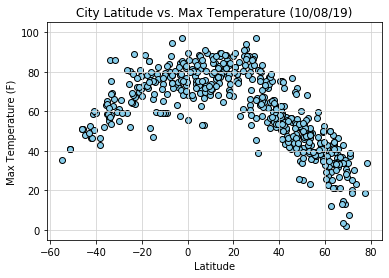

In [5]:
# Creating plot for Lat vs Tempurature
plt.scatter(weather_data_df['Lat'], weather_data_df['Max Temp'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Max Temperature (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(-5, 105)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')

# Saving image
plt.savefig('Images/Latitude vs. Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

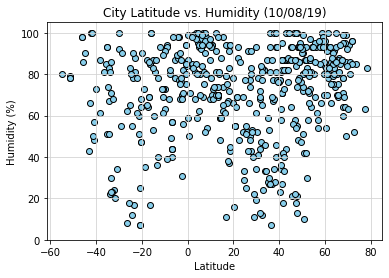

In [6]:
# Creating plot for Lat vs Humidity
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Humidity (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')

# Saving image
plt.savefig('Images/Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

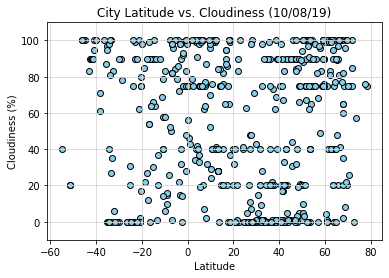

In [7]:
# Creating plot for Lat vs Cloudiness
plt.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Cloudiness (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-10, 110)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')

# Saving image
plt.savefig('Images/Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

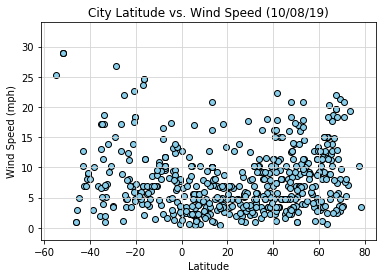

In [8]:
# Creating plot for Lat vs Wind
plt.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed'], edgecolors='black', facecolors='skyblue')
plt.title('City Latitude vs. Wind Speed (10/08/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(-2, 34)
plt.grid (b=True, which='major', axis='both', linestyle='-', color='lightgrey')

# Saving image
plt.savefig('Images/Latitude vs. Wind Speed.png')
plt.show()

In [11]:
# Observations

# 1: Cities in higher latitudes tend to be colder. Cities around 0-20 latitude
# seem to be the warming, aside from a few outliers. This makes sense, as you
# would expect it to be warmer around the equator.

# 2: Cities around 0-20, and 40+ latitude, tend to have higher humidity levels.
# Outliers for low humidity appear at -30 to -20, and 20 to 50.

# 3: Cities tend to be more cloudy towards latitudes above 0. The northern
# hemisphere seems to be more cloudy than the southern hemisphere.

# 4: Perhaps related to cloudiness levels, wind speed seems to be pretty sparse
# below -20 lat, but pick up more at you hit 0 and above, although the highest
# outliers to appear aroudn -50.